# Imports

In [4]:
import pandas as pd
import numpy as np
import spacy
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from wordcloud import WordCloud
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


# Task-1

In [5]:
df = pd.read_csv("fake_dataset.csv")
df["text"] = df["text"].astype(str)
nlp = spacy.load(
    "en_core_web_sm",
    disable=["ner", "parser"]
)

def spacy_preprocess(text):
    doc = nlp(text.lower())
    return " ".join(
        token.lemma_
        for token in doc
        if token.is_alpha and not token.is_stop
    )

df["clean_text"] = df["text"].apply(spacy_preprocess)
tfidf = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1, 2)
)

X = tfidf.fit_transform(df["clean_text"]).toarray()

le = LabelEncoder()
y_category = le.fit_transform(df["category"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_category, test_size=0.2, random_state=42
)

num_classes = len(le.classes_)

model_category = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

model_category.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_category.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

y_pred = np.argmax(model_category.predict(X_test), axis=1)

print("\nCATEGORY CLASSIFICATION REPORT\n")
print(classification_report(
    y_test, y_pred, target_names=le.classes_
))


Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5072 - loss: 1.6973 - val_accuracy: 0.7459 - val_loss: 0.7153
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7850 - loss: 0.6125 - val_accuracy: 0.7601 - val_loss: 0.6789
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8160 - loss: 0.5164 - val_accuracy: 0.7561 - val_loss: 0.6918
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8322 - loss: 0.4706 - val_accuracy: 0.7552 - val_loss: 0.7029
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.4344 - val_accuracy: 0.7487 - val_loss: 0.7240
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8535 - loss: 0.4072 - val_accuracy: 0.7496 - val_loss: 0.7440
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8606 - loss: 0.3890 - val_accuracy: 0.7459 - val_loss: 0.7683
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8664 - loss: 0.3708 - val_accuracy: 0

# Task-2

In [8]:
df["fake_label"] = df["label"].map({"CG": 0, "OR": 1})
y_fake = df["fake_label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y_fake, test_size=0.2, random_state=42
)

model_fake = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_fake.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_fake.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

y_pred_prob = model_fake.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("\nFAKE / REAL CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7638 - loss: 0.5103 - val_accuracy: 0.8529 - val_loss: 0.3268
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8706 - loss: 0.2937 - val_accuracy: 0.8507 - val_loss: 0.3301
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.2637 - val_accuracy: 0.8507 - val_loss: 0.3230
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9104 - loss: 0.2150 - val_accuracy: 0.8491 - val_loss: 0.3349
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.1469 - val_accuracy: 0.8560 - val_loss: 0.3569
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0866 - val_accuracy: 0.8522 - val_loss: 0.4106
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0431 - val_accuracy: 0.8516 - val_loss: 0.4779
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - loss: 0.0212 - val_accuracy: 0

# Task-3

Generating word cloud for category: Books_5


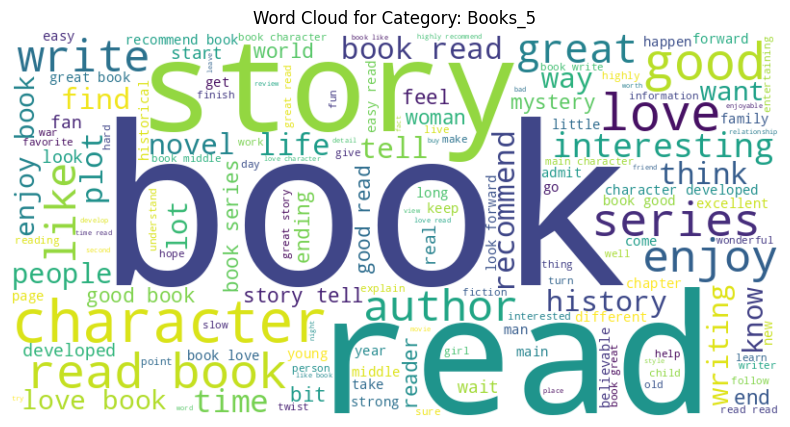

Generating word cloud for category: Clothing_Shoes_and_Jewelry_5


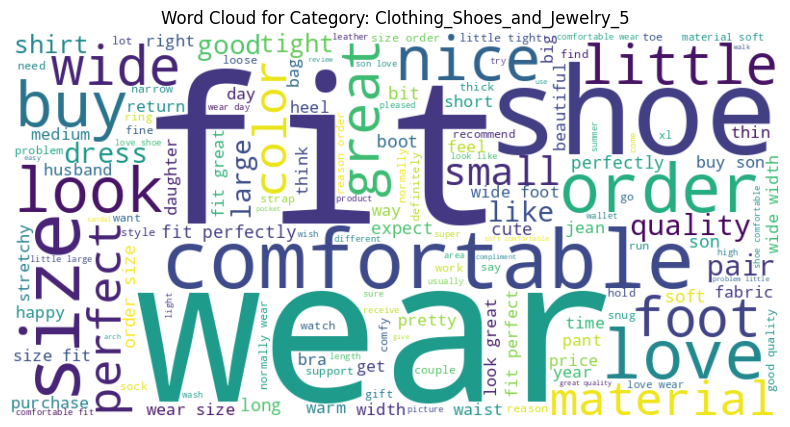

Generating word cloud for category: Electronics_5


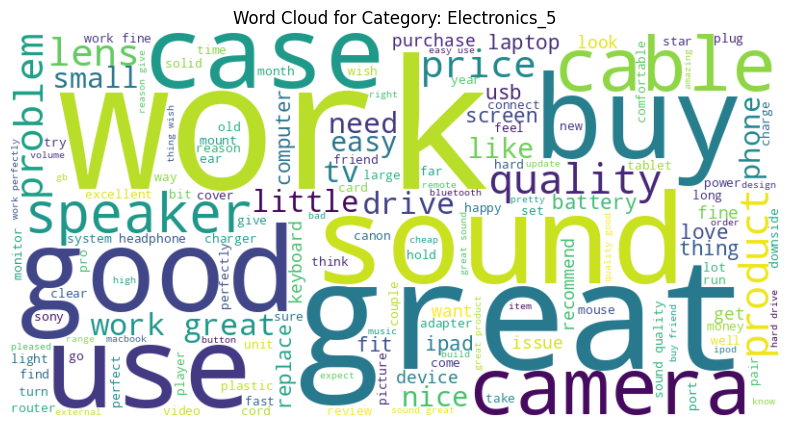

Generating word cloud for category: Home_and_Kitchen_5


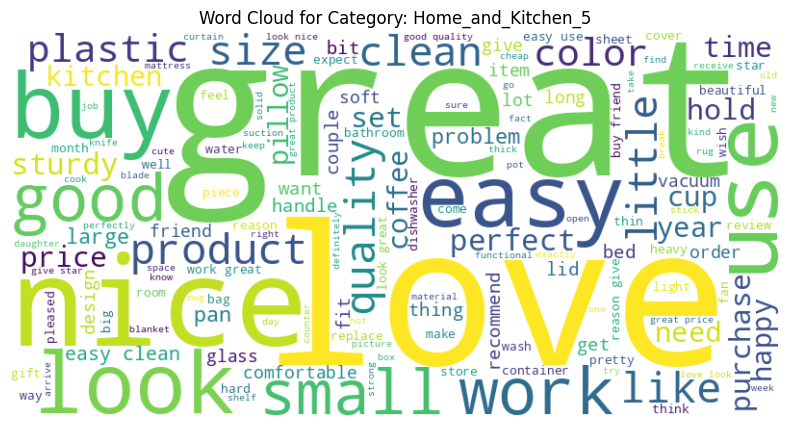

Generating word cloud for category: Kindle_Store_5


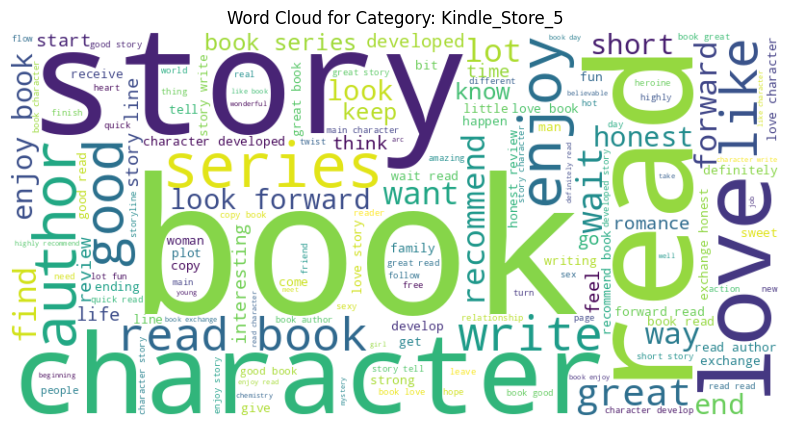

Generating word cloud for category: Movies_and_TV_5


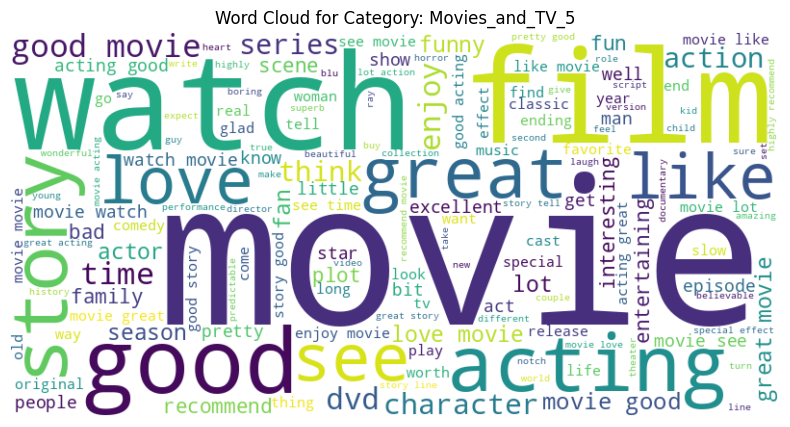

Generating word cloud for category: Pet_Supplies_5


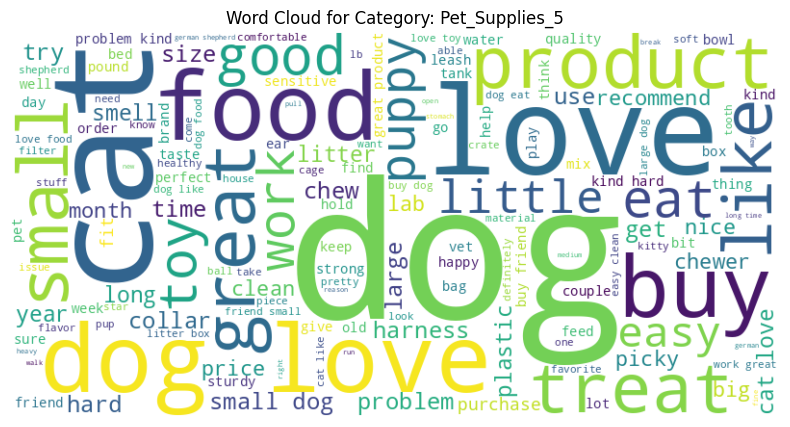

Generating word cloud for category: Sports_and_Outdoors_5


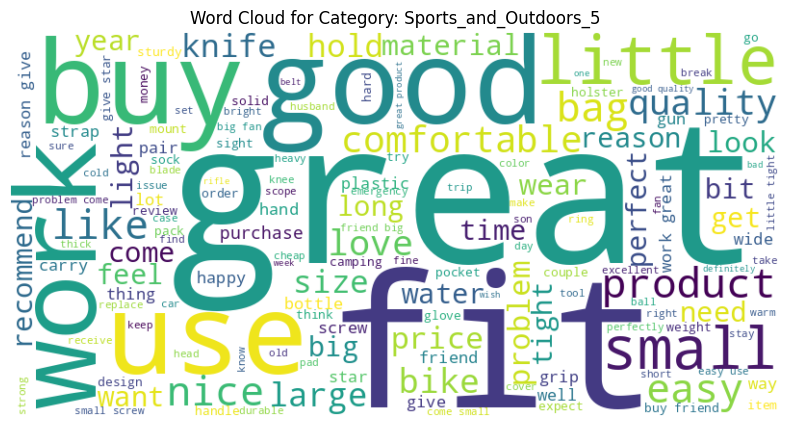

Generating word cloud for category: Tools_and_Home_Improvement_5


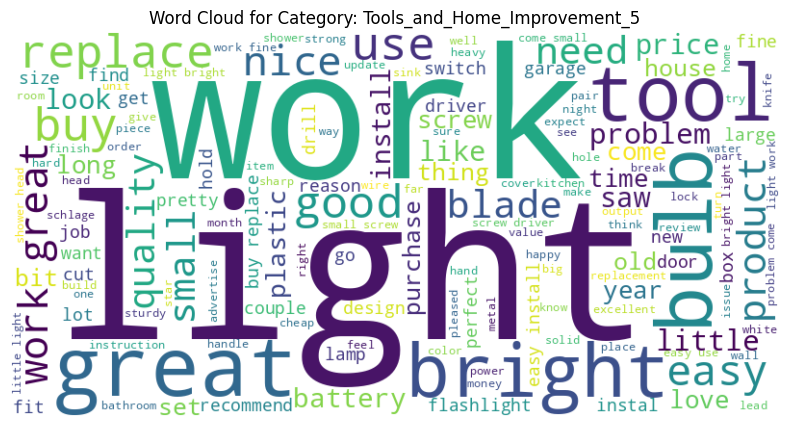

Generating word cloud for category: Toys_and_Games_5


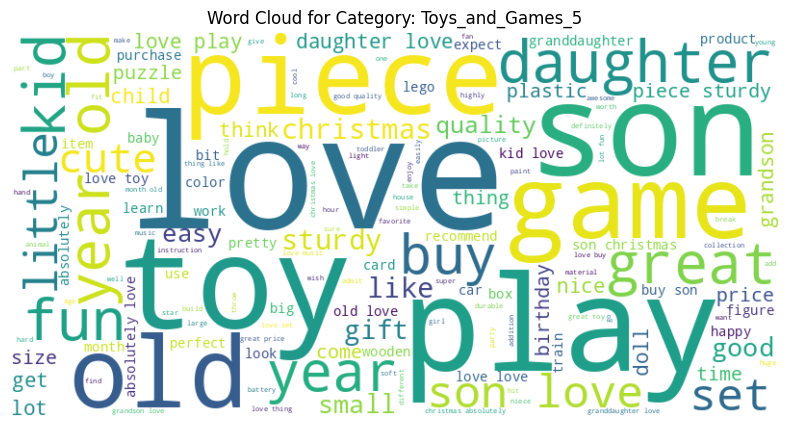

In [9]:

feature_names = tfidf.get_feature_names_out()


for category in le.classes_:
    print(f"Generating word cloud for category: {category}")


    idx = df["category"] == category
    X_cat = X[idx.values]


    mean_tfidf = np.mean(X_cat, axis=0)


    word_freq = {
        word: score
        for word, score in zip(feature_names, mean_tfidf)
        if score > 0
    }


    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=150
    ).generate_from_frequencies(word_freq)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Category: {category}")
    plt.show()
